Автоматизация запросов к Telegram Bot API

In [ ]:
import requests
import time


API_URL = 'https://api.telegram.org/bot'
API_CATS_URL = 'https://api.thecatapi.com/v1/images/search'
BOT_TOKEN = '-'
ERROR_TEXT = 'Здесь должна была быть картинка с котиком :('

offset = -2
counter = 0 
cat_response: requests.Response
cat_link: str


while counter < 100:
    print('attempt =', counter)
    updates = requests.get(f'{API_URL}{BOT_TOKEN}/getUpdates?offset={offset + 1}').json()

    if updates['result']:
        for result in updates['result']:
            offset = result['update_id']
            chat_id = result['message']['from']['id']
            cat_response = requests.get(API_CATS_URL)
            if cat_response.status_code == 200:
                cat_link = cat_response.json()[0]['url']
                requests.get(f'{API_URL}{BOT_TOKEN}/sendPhoto?chat_id={chat_id}&photo={cat_link}')
            else:
                requests.get(f'{API_URL}{BOT_TOKEN}/sendMessage?chat_id={chat_id}&text={ERROR_TEXT}')

    time.sleep(1)
    counter += 1


In [ ]:
import requests
import time


API_URL = 'https://api.telegram.org/bot'
BOT_TOKEN = '------"

offset = -2
updates: dict


def do_something() -> None:
    print('Был апдейт')


while True: 
    start_time = time.time()
    updates = requests.get(f'{API_URL}{BOT_TOKEN}/getUpdates?offset={offset + 1}').json()

    if updates['result']:
        for result in updates['result']:
            offset = result['update_id']
            do_something()

    time.sleep(3)
    end_time = time.time()
    print(f'Время между запросами к Telegram Bot API: {end_time - start_time}')

если апдейты по фильтрам бота подходят нескольким хэндлерам, то диспетчер отдает апдейт тому хэндлеру, который зарегистрирован раньше

In [ ]:
from aiogram import Bot, Dispatcher
from aiogram.filters import Command
from aiogram.types import Message

# Вместо BOT TOKEN HERE нужно вставить токен вашего бота, полученный у @BotFather
BOT_TOKEN = '-----------------------------'

# Создаем объекты бота и диспетчера
bot = Bot(token=BOT_TOKEN)
dp = Dispatcher()


# Этот хэндлер будет срабатывать на команду "/start"
@dp.message(Command(commands=["start"]))
async def process_start_command(message: Message):
    await message.answer('Привет!\nМеня зовут Эхо-бот!\nНапиши мне что-нибудь')


# Этот хэндлер будет срабатывать на команду "/help"
@dp.message(Command(commands=['help']))
async def process_help_command(message: Message):
    await message.answer(
        'Напиши мне что-нибудь и в ответ '
        'я пришлю тебе твое сообщение'
    )


# Этот хэндлер будет срабатывать на любые ваши текстовые сообщения,
# кроме команд "/start" и "/help"
@dp.message()
async def send_echo(message: Message):
    await message.reply(text=message.text)


if __name__ == '__main__':
    dp.run_polling(bot)

In [ ]:
from aiogram import Bot, Dispatcher, F
from aiogram.filters import Command
from aiogram.types import Message

# Вместо BOT TOKEN HERE нужно вставить токен вашего бота,
# полученный у @BotFather
BOT_TOKEN = '------------------------'

# Создаем объекты бота и диспетчера
bot = Bot(token=BOT_TOKEN)
dp = Dispatcher()


# Этот хэндлер будет срабатывать на команду "/start"
async def process_start_command(message: Message):
    await message.answer('Привет!\nМеня зовут Эхо-бот!\nНапиши мне что-нибудь')


# Этот хэндлер будет срабатывать на команду "/help"
async def process_help_command(message: Message):
    await message.answer(
        'Напиши мне что-нибудь и в ответ '
        'я пришлю тебе твое сообщение'
    )

# Этот хэндлер будет срабатывать на отправку боту фото
async def send_photo_echo(message: Message):
    await message.reply_photo(message.photo[-1].file_id)


# Этот хэндлер будет срабатывать на любые ваши текстовые сообщения,A
# кроме команд "/start" и "/help"
async def send_echo(message: Message)
    print(message.model_dump_json(indent=4, exclude_none=True)) # отладка вывода
    await message.reply(text=message.text)

async def send_video_echo(message: Message):
    await message.reply_video(message.video.file_id)

async def send_sticker_echo(message: Message):
    await message.reply_sticker(message.sticker[0].file_id)

async def send_voice_echo(message: Message):
    await message.reply_voice(message.voice.file_id)

# Регистрируем хэндлеры
dp.message.register(process_start_command, Command(commands='start'))
dp.message.register(process_help_command, Command(commands='help'))
dp.message.register(send_photo_echo, F.photo)
dp.message.register(send_video_echo, F.video)
dp.message.register(send_sticker_echo, F.sticker)
dp.message.register(send_voice_echo, F.voice)
dp.message.register(send_echo)

if __name__ == '__main__':
    dp.run_polling(bot)

In [ ]:
from aiogram import Bot, Dispatcher
from aiogram.filters import Command
from aiogram.types import Message

# Вместо BOT TOKEN HERE нужно вставить токен вашего бота,
# полученный у @BotFather
BOT_TOKEN = 'BOT TOKEN HERE'

# Создаем объекты бота и диспетчера
bot = Bot(token=BOT_TOKEN)
dp = Dispatcher()


# Этот хэндлер будет срабатывать на команду "/start"
@dp.message(Command(commands='start'))
async def process_start_command(message: Message):
    await message.answer('Привет!\nМеня зовут Эхо-бот!\nНапиши мне что-нибудь')


# Этот хэндлер будет срабатывать на команду "/help"
@dp.message(Command(commands='help'))
async def process_help_command(message: Message):
    await message.answer(
        'Напиши мне что-нибудь и в ответ '
        'я пришлю тебе твое сообщение'
    )


# Этот хэндлер будет срабатывать на любые ваши сообщения,
# кроме команд "/start" и "/help"
@dp.message()
async def send_echo(message: Message):
    try:
        await message.send_copy(chat_id=message.chat.id)
    except TypeError:
        await message.reply(
            text='Данный тип апдейтов не поддерживается '
                 'методом send_copy'
        )


if __name__ == '__main__':
    dp.run_polling(bot)

Апдейт (Update) - это любое событие, которое Telegram сохраняет для бота, которое затем можно получить по запросу и как-то обработать. То есть при взаимодействии с ботом, почти на любые действия пользователя, сохраняются апдейты на серверах Telegram. Пользователь отправил боту сообщение - апдейт, пользователь нажал на инлайн-кнопку - апдейт, пользователь отправил боту стикер - тоже апдейт. 

Апдейты Телеграм хранит в JSON-формате 

. Вот так, например, выглядит апдейт, когда пользователь отправляет боту команду /start:

In [ ]:
{
  "ok": true,
  "result": [
    {
      "update_id": 396714639,
      "message": {
        "message_id": 6190,
        "from": {
          "id": 173901673,
          "is_bot": false,
          "first_name": "Mikhail",
          "last_name": "Kryzhanovskiy",
          "username": "kmsint",
          "language_code": "ru"
        },
        "chat": {
          "id": 173901673,
          "first_name": "Mikhail",
          "last_name": "Kryzhanovskiy",
          "username": "kmsint",
          "type": "private"
        },
        "date": 1675406880,
        "text": "/start",
        "entities": [
          {
            "offset": 0,
            "length": 6,
            "type": "bot_command"
          }
        ]
      }
    }
  ]
}

В таком виде апдейты забирает aiogram и далее превращает их в объекты Python, с которыми удобно работать, обращаясь к атрибутам и методам этих объектов. Вот, например, как выглядит тот же самый апдейт на команду /start, который мы получили выше, но в виде объекта типа Message:

In [ ]:
message_id=6190
date=datetime.datetime(2023, 2, 3, 6, 48, tzinfo=datetime.timezone.utc)
chat=Chat(id=173901673,
          type='private',
          title=None,
          username='kmsint',
          first_name='Mikhail',
          last_name='Kryzhanovskiy',
          is_forum=None,
          photo=None,
          active_usernames=None,
          emoji_status_custom_emoji_id=None,
          bio=None,
          has_private_forwards=None,
          has_restricted_voice_and_video_messages=None,
          join_to_send_messages=None,
          join_by_request=None,
          description=None,
          invite_link=None,
          pinned_message=None,
          permissions=None,
          slow_mode_delay=None,
          message_auto_delete_time=None,
          has_protected_content=None,
          sticker_set_name=None,
          can_set_sticker_set=None,
          linked_chat_id=None,
          location=None)
message_thread_id=None
from_user=User(id=173901673,
               is_bot=False, first_name='Mikhail',
               last_name='Kryzhanovskiy',
               username='kmsint',
               language_code='ru',
               is_premium=None,
               added_to_attachment_menu=None,
               can_join_groups=None,
               can_read_all_group_messages=None,
               supports_inline_queries=None)
sender_chat=None
forward_from=None
forward_from_chat=None
forward_from_message_id=None
forward_signature=None
forward_sender_name=None
forward_date=None
is_topic_message=None
is_automatic_forward=None
reply_to_message=None
via_bot=None
edit_date=None
has_protected_content=None
media_group_id=None
author_signature=None
text='/start'
entities=[MessageEntity(type='bot_command',
                        offset=0,
                        length=6,
                        url=None,
                        user=None,
                        language=None,
                        custom_emoji_id=None)]
animation=None
audio=None
document=None
photo=None
sticker=None
video=None
video_note=None
voice=None
caption=None
caption_entities=None
contact=None
dice=None
game=None
poll=None
venue=None
location=None
new_chat_members=None
left_chat_member=None
new_chat_title=None
new_chat_photo=None
delete_chat_photo=None
group_chat_created=None
supergroup_chat_created=None
channel_chat_created=None
message_auto_delete_timer_changed=None
migrate_to_chat_id=None
migrate_from_chat_id=None
pinned_message=None
invoice=None successful_payment=None
connected_website=None
passport_data=None
proximity_alert_triggered=None
forum_topic_created=None
forum_topic_closed=None
forum_topic_reopened=None
video_chat_scheduled=None
video_chat_started=None
video_chat_ended=None
video_chat_participants_invited=None
web_app_data=None
reply_markup=None

Иногда апдейт удобно анализировать в JSON-формате. Для этого у объекта типа Message как раз есть метод model_dump_json()

команда print(message.model_dump_json(indent=4, exclude_none=True)) выведет прямо в терминал объект типа Message с командой /start в удобном виде

In [ ]:
import random

from aiogram import Bot, Dispatcher, F
from aiogram.filters import Command, CommandStart
from aiogram.types import Message

# Вместо BOT TOKEN HERE нужно вставить токен вашего бота,
# полученный у @BotFather
BOT_TOKEN = 'BOT TOKEN HERE'

# Создаем объекты бота и диспетчера
bot = Bot(BOT_TOKEN)
dp = Dispatcher()

# Количество попыток, доступных пользователю в игре
ATTEMPTS = 5

# Словарь, в котором будут храниться данные пользователя
user = {'in_game': False,
        'secret_number': None,
        'attempts': None,
        'total_games': 0,
        'wins': 0}


# Функция возвращающая случайное целое число от 1 до 100
def get_random_number() -> int:
    return random.randint(1, 100)


# Этот хэндлер будет срабатывать на команду "/start"
@dp.message(CommandStart())
async def process_start_command(message: Message):
    await message.answer(
        'Привет!\nДавайте сыграем в игру "Угадай число"?\n\n'
        'Чтобы получить правила игры и список доступных '
        'команд - отправьте команду /help'
    )


# Этот хэндлер будет срабатывать на команду "/help"
@dp.message(Command(commands='help'))
async def process_help_command(message: Message):
    await message.answer(
        'Правила игры:\n\nЯ загадываю число от 1 до 100, '
        f'а вам нужно его угадать\nУ вас есть {ATTEMPTS} '
        'попыток\n\nДоступные команды:\n/help - правила '
        'игры и список команд\n/cancel - выйти из игры\n'
        '/stat - посмотреть статистику\n\nДавай сыграем?'
    )


# Этот хэндлер будет срабатывать на команду "/stat"
@dp.message(Command(commands='stat'))
async def process_stat_command(message: Message):
    await message.answer(
        f'Всего игр сыграно: {user["total_games"]}\n'
        f'Игр выиграно: {user["wins"]}'
    )


# Этот хэндлер будет срабатывать на команду "/cancel"
@dp.message(Command(commands='cancel'))
async def process_cancel_command(message: Message):
    if user['in_game']:
        user['in_game'] = False
        await message.answer(
            'Вы вышли из игры. Если захотите сыграть '
            'снова - напишите об этом'
        )
    else:
        await message.answer(
            'А мы и так с вами не играем. '
            'Может, сыграем разок?'
        )


# Этот хэндлер будет срабатывать на согласие пользователя сыграть в игру
@dp.message(F.text.lower().in_(['да', 'давай', 'сыграем', 'игра',
                                'играть', 'хочу играть']))
async def process_positive_answer(message: Message):
    if not user['in_game']:
        user['in_game'] = True
        user['secret_number'] = get_random_number()
        user['attempts'] = ATTEMPTS
        await message.answer(
            'Ура!\n\nЯ загадал число от 1 до 100, '
            'попробуй угадать!'
        )
    else:
        await message.answer(
            'Пока мы играем в игру я могу '
            'реагировать только на числа от 1 до 100 '
            'и команды /cancel и /stat'
        )


# Этот хэндлер будет срабатывать на отказ пользователя сыграть в игру
@dp.message(F.text.lower().in_(['нет', 'не', 'не хочу', 'не буду']))
async def process_negative_answer(message: Message):
    if not user['in_game']:
        await message.answer(
            'Жаль :(\n\nЕсли захотите поиграть - просто '
            'напишите об этом'
        )
    else:
        await message.answer(
            'Мы же сейчас с вами играем. Присылайте, '
            'пожалуйста, числа от 1 до 100'
        )


# Этот хэндлер будет срабатывать на отправку пользователем чисел от 1 до 100
@dp.message(lambda x: x.text and x.text.isdigit() and 1 <= int(x.text) <= 100)
async def process_numbers_answer(message: Message):
    if user['in_game']:
        if int(message.text) == user['secret_number']:
            user['in_game'] = False
            user['total_games'] += 1
            user['wins'] += 1
            await message.answer(
                'Ура!!! Вы угадали число!\n\n'
                'Может, сыграем еще?'
            )
        elif int(message.text) > user['secret_number']:
            user['attempts'] -= 1
            await message.answer('Мое число меньше')
        elif int(message.text) < user['secret_number']:
            user['attempts'] -= 1
            await message.answer('Мое число больше')

        if user['attempts'] == 0:
            user['in_game'] = False
            user['total_games'] += 1
            await message.answer(
                'К сожалению, у вас больше не осталось '
                'попыток. Вы проиграли :(\n\nМое число '
                f'было {user["secret_number"]}\n\nДавайте '
                'сыграем еще?'
            )
    else:
        await message.answer('Мы еще не играем. Хотите сыграть?')


# Этот хэндлер будет срабатывать на остальные любые сообщения
@dp.message()
async def process_other_answers(message: Message):
    if user['in_game']:
        await message.answer(
            'Мы же сейчас с вами играем. '
            'Присылайте, пожалуйста, числа от 1 до 100'
        )
    else:
        await message.answer(
            'Я довольно ограниченный бот, давайте '
            'просто сыграем в игру?'
        )


if __name__ == '__main__':
    dp.run_polling(bot)

Aiogram предлагает ряд уже готовых фильтров и CommandStart один из них. Он предназначен для фильтрации апдейтов с командой /start.

Далее про магический фильтр. В нашем боте конструкция F.text.lower().in_(['да', 'давай', 'сыграем', 'игра', 'играть', 'хочу играть']) проверяет текст на полное совпадение строк без учета регистра. То есть через фильтр пройдут сообщения "Да", "ДА", "да", "дА", "ДаВаЙ" и так далее. Тоже самое про фильтрацию по тексту отказа от игры: F.text.lower().in_(['нет', 'не', 'не хочу', 'не буду']). 

Фильтр - это, по сути, функция, которая берет апдейт, что-то с ним делает и возвращает либо True, либо False. Если True - фильтр пройден, а если False, соответственно, нет.

 Этот фильтр, который Command(commands='start'), срабатывает на наличие команды /start в тексте, не зависимо от того, состоит текст сообщения от пользователя только из этой команды или содержит еще другие команды и слова. Для него важно только чтобы сообщение начиналось с команды /start.

Опираясь на JSON объект типа Message можно написать свой фильтр вида:

In [ ]:
def my_start_filter(message: Message) -> bool:
    return message.text == '/start'

Фильтр, который мы написали на команду /start можно переписать в виде анонимной функции:

In [ ]:
lambda msg: msg.text == '/start'

lambda msg: msg.text == '/start'

In [ ]:
# Этот хэндлер будет срабатывать на тип контента "voice", "video" или "text"
@dp.message(F.content_type.in_({'voice', 'video', 'text'}))
async def process_send_vovite(message: Message):
    await message.answer(text='Вы прислали войс, видео или текст')

In [ ]:
# Этот хэндлер будет срабатывать на тип контента "voice", "video" или "text"
@dp.message(F.content_type.in_({ContentType.VOICE,
                                ContentType.VIDEO,
                                ContentType.TEXT}))
async def process_send_vovite(message: Message):
    await message.answer(text='Вы прислали войс, видео или текст')

Фильтр commmand

Это фильтр на команды, то есть на слова, идущие в начале сообщения и начинающиеся с символа "/", называемого префиксом (/start, /help, /settings, /support и т.п.). Префикс можно изменить, если передать его явно в параметр prefix. То есть, если, например, мы хотим, чтобы бот считал командами не только слова, начинающиеся с "/", но и начинающиеся с "|" - можно передать аргумент "|" в качестве префикса. Но только надо иметь в виду, что телеграм все равно будет делать привычно кликабельными только слова, начинающиеся с префикса "/".

То есть, если сделать 2 хэндлера - один на команду /start с префиксом по умолчанию, а второй с префиксом "|", то работать они будут одинаково, но в чате кликнуть можно будет только на стандартный вид команды.

In [ ]:
from aiogram.filters import Command

# ...

# Этот хэндлер будет срабатывать на команду "/start"
@dp.message(Command(commands='start'))
async def process_command_start(message: Message):
    await message.answer('Это команда /start')


# Этот хэндлер будет срабатывать на команду "|start"
@dp.message(Command(commands='start', prefix='|'))
async def process_command_start_2(message: Message):
    await message.answer('И это команда /start')

# ...

Фильтр CommandStart
Также есть отдельный фильтр конкретно на команду старт. То есть вместо фильтра Command(commands=['start']) можно использовать фильтр CommandStart() и они будут работать одинаково.

In [ ]:
from aiogram.filters import CommandStart

# ...

@dp.message(CommandStart())
async def process_command_start(message: Message):
    await message.answer('Это команда /start')

# ...

Фильтр ChatMemberUpdatedFilter
Этот фильтр можно использовать для того, чтобы отлавливать изменения в статусах пользователей. Вот некоторые примеры таких изменений:

Пользователь вступил в канал или группу
Пользователь покинул канал или группу
Пользователь стал админом группы или канала
Пользователь перестал быть админом группы или канала
Пользователь заблокировал бота
Пользователь разблокировал бота
Пользователь удален из группы или канала администратором

 для того, чтобы отловить блокировку бота пользователем:


In [ ]:
from aiogram.filters import ChatMemberUpdatedFilter, KICKED
from aiogram.types import ChatMemberUpdated

# ...

# Этот хэндлер будет срабатывать на блокировку бота пользователем
@dp.my_chat_member(ChatMemberUpdatedFilter(member_status_changed=KICKED))
async def process_user_blocked_bot(event: ChatMemberUpdated):
    print(f'Пользователь {event.from_user.id} заблокировал бота')

Фильтр, который будет пропускать только апдейты от пользователя с ID = 173901673.

In [ ]:
lambda message: message.from_user.id == 173901673 # через lambda

F.from_user.id == 173901673 # через F

Фильтр, который будет пропускать только апдейты от админов из списка 193905674, 173901673, 144941561:

In [ ]:
F.from_user.id.in_({193905674, 173901673, 144941561})

Фильтр, который будет пропускать в хэндлер апдейты любого типа, кроме фото, видео, аудио и документов.

In [ ]:
~F.content_type.in_({ContentType.PHOTO,
                     ContentType.VIDEO,
                     ContentType.AUDIO,
                     ContentType.DOCUMENT})

 В магическом методе __call__ собственных классов, наследуемых от BaseFilter, можно написать свою логику, по которой будут фильтроваться апдейты. И в следующем шаге мы посмотрим некоторые примеры таких фильтров.

в качестве примера напишем собственный фильтр IsAdmin, который будет проверять апдейт на то, что он пришел от пользователя, который входит в список администраторов бота.

In [ ]:
from aiogram import Bot, Dispatcher
from aiogram.filters import BaseFilter
from aiogram.types import Message

# Вместо BOT TOKEN HERE нужно вставить токен вашего бота,
# полученный у @BotFather
BOT_TOKEN = 'BOT TOKEN HERE'

# Создаем объекты бота и диспетчера
bot = Bot(token=BOT_TOKEN)
dp = Dispatcher()

# Список с ID администраторов бота. !!!Замените на ваш!!!
admin_ids: list[int] = [173901673]


# Собственный фильтр, проверяющий юзера на админа
class IsAdmin(BaseFilter):
    def __init__(self, admin_ids: list[int]) -> None:
        # В качестве параметра фильтр принимает список с целыми числами 
        self.admin_ids = admin_ids

    async def __call__(self, message: Message) -> bool:
        return message.from_user.id in self.admin_ids


# Этот хэндлер будет срабатывать, если апдейт от админа
@dp.message(IsAdmin(admin_ids))
async def answer_if_admins_update(message: Message):
    await message.answer(text='Вы админ')


# Этот хэндлер будет срабатывать, если апдейт не от админа
@dp.message()
async def answer_if_not_admins_update(message: Message):
    await message.answer(text='Вы не админ')


if __name__ == '__main__':
    dp.run_polling(bot)

чтобы "правильно" передать данные из фильтра в хэндлер - согласно документации aiogram - нужно передавать их словарем, который вместе с апдейтом будет также передан в хэндлер.

In [ ]:
# ...

# Этот фильтр будет проверять наличие неотрицательных чисел
# в сообщении от пользователя, и передавать в хэндлер их список
class NumbersInMessage(BaseFilter):
    async def __call__(self, message: Message) -> bool | dict[str, list[int]]:
        numbers = []
        # Разрезаем сообщение по пробелам, нормализуем каждую часть, удаляя
        # лишние знаки препинания и невидимые символы, проверяем на то, что
        # в таких словах только цифры, приводим к целым числам
        # и добавляем их в список
        for word in message.text.split():
            normalized_word = word.replace('.', '').replace(',', '').strip()
            if normalized_word.isdigit():
                numbers.append(int(normalized_word))
        # Если в списке есть числа - возвращаем словарь со списком чисел по ключу 'numbers'
        if numbers:
            return {'numbers': numbers}
        return False

# ...
# ...

# Этот хэндлер будет срабатывать, если сообщение пользователя
# начинается с фразы "найди числа" и в нем есть числа
@dp.message(F.text.lower().startswith('найди числа'),
            NumbersInMessage())
# Помимо объекта типа Message, принимаем в хэндлер список чисел из фильтра
# по соответствующему ключу `numbers`
async def process_if_numbers(message: Message, numbers: list[int]):
    await message.answer(
            text=f'Нашел: {", ".join(str(num) for num in numbers)}')


# Этот хэндлер будет срабатывать, если сообщение пользователя
# начинается с фразы "найди числа", но в нем нет чисел
@dp.message(F.text.lower().startswith('найди числа'))
async def process_if_not_numbers(message: Message):
    await message.answer(
            text='Не нашел что-то :(')

# ...

 Когда мы указываем в хэндлере дополнительные параметры, по которым хотим принять данные из фильтра, важно чтобы их название совпадало с ключами в словаре, который возвращает фильтр.

Если фильтры указать через запятую, то между ними будет проверяться условие "И", то есть, чтобы сработал хэндлер, с такими фильтрами - все фильтры должны вернуть True (или, если быть точнее - значения, которые могут быть приведены интерпретатором к True).

Если нужно, чтобы фильтры работали по условию "ИЛИ", то есть хэндлер срабатывал бы тогда, когда хотя бы один фильтр из цепочки возвращал True - нужно декорировать хэндлер столько раз, сколько фильтров в цепочке.

In [ ]:
@dp.message(F.content_type == ContentType.VIDEO)
@dp.message(F.text.lower().startswith('привет'))

# True or False == True
# False or True == True
# False or False == False

Если нужно инвертировать результат работы фильтра - используется знак ~ перед фильтром.

In [ ]:
@dp.message(~F.text.startswith('привет'))

Магические фильтры можно комбинировать, используя операции побитового сравнения И/ИЛИ (& / |).

Пример. Апдейт с типом контента текст или фото от пользователя с ID = 173901673. Тип контента текст или фото имеется в виду. Притом от пользователя с указанным ID. 

In [ ]:
@dp.message((F.text | F.photo) & F.from_user.id == 173901673)

В качестве способа объединения фильтров можно использовать функции and_f(), or_f(), invert_f(), импортируемые из aiogram.filters. В качестве аргументов в эти функции передаются фильтры через запятую. and_f() отвечает за логическое И, or_f() за логическое ИЛИ, а invert_f() за логическое НЕ.

Пример. Хэндлер должен получить апдейт с типом контента текст, заканчивающийся на 'bot' от пользователя с ID = 173901673.

In [ ]:
from aiogram.filters import and_f

# ...

@dp.message(and_f(F.text.endswith('bot'), F.from_user.id == 173901673))

Фильтры - это существенная часть механизма работы фреймворка aiogram. С их помощью диспетчер понимает какому хэндлеру передать апдейт на дальнейшую обработку. Когда мы создаем какой-то хэндлер - мы должны понимать при каких условиях он должен начать свою работу. В большинстве случаев, таким условием является апдейт с нужными нам свойствами, который проходит через установленные перед хэндлером фильтры.

Фильтры, по сути - это функции или методы (как синхронные, так и асинхронные), которые принимают на вход апдейт, что-то с ним делают, например, проверяют на тип контента или на наличие команд в тексте сообщения, или на наличие ключевых слов, или что апдейт от определенного пользователя и т.п., и возвращают либо True/False, либо какие-то данные для дальнейшей передачи их в хэндлер.

Наличие непустых (ненулевых) данных в результате работы фильтра равнозначно тому, что фильтр вернул True, то есть был пройден апдейтом.

Фильтры указываются при регистрации хэндлеров либо через декораторы, либо через регистрацию их методами диспетчера (роутеров). В частности, диспетчер - это корневой роутер. О роутерах будет дальше в курсе.

Магические фильтры - это более лаконичный способ использования анонимных функций в качестве фильтров.

Фильтры можно комбинировать:

Через порядок их регистрации
Через побитовые операции - & / | - для магических фильтров
С помощью функций and_f(), or_f() - для любых фильтров
Результат работы фильтра можно инвертировать:

С помощью побитовой операции инверсии ~
С помощью функции invert_f()
Можно создавать свои фильтры-классы и желательно их наследовать от BaseFilter, чтобы придерживаться единообразия оформления кода.

минутка ликбеза - как посмотреть список встроенных в python модулей:

In [2]:
import sys

print(sys.builtin_module_names)

('_abc', '_ast', '_bisect', '_blake2', '_codecs', '_codecs_cn', '_codecs_hk', '_codecs_iso2022', '_codecs_jp', '_codecs_kr', '_codecs_tw', '_collections', '_contextvars', '_csv', '_datetime', '_functools', '_heapq', '_imp', '_interpchannels', '_interpqueues', '_interpreters', '_io', '_json', '_locale', '_lsprof', '_md5', '_multibytecodec', '_opcode', '_operator', '_pickle', '_random', '_sha1', '_sha2', '_sha3', '_signal', '_sre', '_stat', '_statistics', '_string', '_struct', '_symtable', '_sysconfig', '_thread', '_tokenize', '_tracemalloc', '_typing', '_warnings', '_weakref', '_winapi', 'array', 'atexit', 'binascii', 'builtins', 'cmath', 'errno', 'faulthandler', 'gc', 'itertools', 'marshal', 'math', 'mmap', 'msvcrt', 'nt', 'sys', 'time', 'winreg', 'xxsubtype', 'zlib')


Пакеты в Python - это папки (или по умному - директории) с модулями. Еще бывают подпакеты, как несложно догадаться - это пакеты в пакетах.

Пусть мы хотим в файл main.py импортировать переменную из файла file_11.py, который находится в пакете pack_1.

In [ ]:
print('Это основной модуль main.py, его имя в процессе выполнения программы:', __name__)


from pack_1.file_11 import a


print('a =', a)

С помощью файла __init__.py в пакете можно управлять пространством имен, которое будет доступно при импорте пакета. Это удобно и позволяет иметь больше контроля над происходящим

При импорте пакета, если в нем есть __init__.py, код в этом файле исполняется, поэтому в нем можно указать, что именно импортировать из модулей пакета или подпакетов.

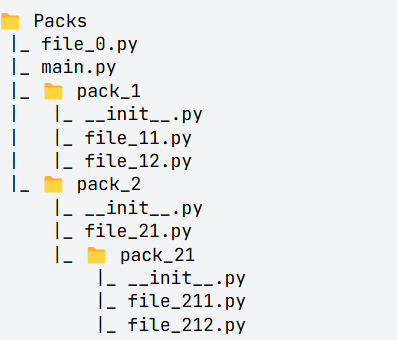

Хочу заострить внимание на некоторых аспектах, связанных с импортами, которые позволят вам сэкономить кучу времени.

Абсолютные импорты отсчитываются от директории, в которой находится исполняемый файл, то есть файл, который в процессе выполнения, имеет имя __main__.

В исполняемом файле - точке входа в проект, не может, по умолчанию, быть относительных импортов - только абсолютные.

Относительными импортами, без "хаков" и "костылей" нельзя подниматься на уровень, в котором находится исполняемый файл - интерпретатор выдаст ошибку.

Относительные импорты могут быть оправданы внутри пакетов, но надежнее использовать абсолютные импорты, если вы пока не "набили руку".

Чтобы модули были доступны на уровне пакетов - используйте инициализатор пакета __init__.py, в котором пропишите импорты этих модулей.

Импорты со звездочкой оправданы, когда надо получить доступ к объектам модулей, подпакетов, модулей в подпакетах и т.д. на уровне пакета.

Контролировать то, что можно импортировать из модуля, при использовании импорта со звездочкой, можно либо называя скрытые объекты с нижнего подчеркивания, либо перечисляя доступные объекты в переменной __all__.

Чтобы избежать перекрытий имен объектов - помните о порядке поиска модулей и пакетов интерпретатором. Что первое будет найдено, то и импортируется.

Сначала идет поиск модулей и пакетов во встроенных модулях (builtin_module_names)

Затем поиск в корне проекта (в той же директории, что и исполняемый файл)

Затем идет обращение к переменной PYTHONPATH

Далее идет поиск в модулях стандартной библиотеки (stdlib_module_names)

В самую последнюю очередь поиск модулей и пакетов происходит среди установленных сторонних библиотек в папке site-packages

Не допускайте циклических импортов - интерпретатор выдаст ошибку.

Стандартная библиотека logging

In [ ]:
import logging

logging.debug('Это лог уровня DEBUG')
logging.info('Это лог уровня INFO')
logging.warning('Это лог уровня WARNING')
logging.error('Это лог уровня ERROR')
logging.critical('Это лог уровня CRITICAL')

DEBUG
Используется для отладки. Это, наверное, самый близкий к принтам уровень логирования по смыслу. Чаще всего нам не нужна в продакшне отладочная информация, она нужна только разработчику для какой-то диагностики приложения. Так же, как отладочные принты нам становятся не нужны после того, как мы добились желаемого поведения от настраиваемого участка кода, так же и логирование уровня DEBUG обычно игнорируется во время штатной работы приложения.

INFO
Этот уровень используется для того, чтобы сообщить разработчику, что все идет как запланировано. Также редко нужен вне процесса отладки и тоже похож по смыслу на логирование принтами.

WARNING
Данный уровень предназначен для логирования событий, которые могут привести к проблемам в будущем, но пока не влияют на работу приложения. Типичный пример логов такого уровня - это сообщение о заканчивающемся месте на диске. Пока хватает и все работает, но если с этим что-то не сделать, то можно столкнуться с нежелательными последствиями.

ERROR
Уровень ERROR отвечает за ошибки в работе приложения. Что-то идет не так. Приложение еще не падает, но уже явно требует обратить на себя внимание.

CRITICAL
Уровень для серьезных ошибок, после которых, чаще всего, приложение уже не сможет работать дальше.

Как я уже сказал, по умолчанию, выставлен уровень WARNING и все, что ниже, то есть DEBUG и INFO, будет проигнорировано программой. Но я еще не показал как эти уровни настраиваются. Сейчас исправлюсь. В библиотеке logging есть класс basicConfig, у которого есть параметр level, как раз и отвечающий за базовую настройку уровня логирования. Давайте посмотрим как это работет.

 Настраиваем уровень DEBUG, как минимальный уровень, с которого требуется вывод логов.

In [ ]:
import logging

logging.basicConfig(level=logging.DEBUG)

logging.debug('Это лог уровня DEBUG')
logging.info('Это лог уровня INFO')
logging.warning('Это лог уровня WARNING')
logging.error('Это лог уровня ERROR')
logging.critical('Это лог уровня CRITICAL')

Центральными объектами в рамках логирования считаются логгеры - экземпляры класса Logger. Именно через логгеры удобно создавать логи и управлять их выводом. Логгеров в проекте может быть сколько угодно, но обычно по одному в каждом модуле проекта, а также корневой логгер (root). Создаются логгеры просто - с помощью вызова функции getLogger(). При этом, если не передать в функцию никаких аргументов, то будет получена ссылка на корневой:

In [3]:
import logging

logger = logging.getLogger()

print(logger)

<RootLogger root (WARNING)>


Логгеров с одинаковым именем не может быть больше одного
Логгеры следует называть по имени модуля, в котором они создаются, передавая в функцию getLogger аргумент __name__.
Корневым логгером является root-логгер
У каждого логгера, кроме root, есть предки
Если в каком-то логгере не заданы его настройки - берутся настройки его предка, вплоть до root-логгера.

In [ ]:
import logging

logger = logging.getLogger(__name__)

logger.warning('Предупреждение!')
logger.debug('Отладочная информация')

%(asctime)s - время создания лога в виде, понятном человеку. По умолчанию выглядит так - 2023-12-31 11:29:31,689
%(filename)s - имя модуля, в котором сработал вызов лога
%(funcName)s - имя функции, в которой произошел вызов лога
%(levelname)s - уровень, на котором был вызван данный лог (DEBUG, INFO и т.п.)
%(lineno)d - номер строки кода, на которой произошел вызов лога
%(name)s - имя логгера
%(message)s - сообщение, которое должно быть выведено вместе с логом

In [ ]:
format='[%(asctime)s] #%(levelname)-8s %(filename)s:'
 #      '%(lineno)d - %(name)s - %(message)s'

чаще используют такой формат:

In [ ]:
import logging

logging.basicConfig(
    level=logging.DEBUG,
    format='[%(asctime)s] #%(levelname)-8s %(filename)s:'
           '%(lineno)d - %(name)s - %(message)s'
)

logger = logging.getLogger(__name__)

logger.debug('Лог уровня DEBUG')

Пример вывода:

[2024-01-02 16:42:22,074] #DEBUG    test_5.py:11 - __main__ - Лог уровня DEBUG

Или через фигурные скобки:

In [ ]:
import logging

logging.basicConfig(
    level=logging.DEBUG,
    format='[{asctime}] #{levelname:8} {filename}:'
           '{lineno} - {name} - {message}',
    style='{'
)

logger = logging.getLogger(__name__)

logger.debug('Лог уровня DEBUG')

 Хэндлеры для вывода логов в stderr и stdout:


In [ ]:
import logging
import sys

logger = logging.getLogger(__name__)

stderr_handler = logging.StreamHandler()
stdout_handler = logging.StreamHandler(sys.stdout)

logger.addHandler(stdout_handler)
logger.addHandler(stderr_handler)

print(logger.handlers)

logger.warning('Это лог с предупреждением!')

 Хэндлеры для вывода логов в stderr и stdout с разным форматированием.

Чтобы добавить форматтер к хэндлеру - нужно воспользоваться методом setFormatter.

In [ ]:
import logging
import sys

# Определяем первый вид форматирования
format_1 = '#%(levelname)-8s [%(asctime)s] - %(filename)s:'\
           '%(lineno)d - %(name)s - %(message)s'
# Определяем второй вид форматирования
format_2 = '[{asctime}] #{levelname:8} {filename}:'\
           '{lineno} - {name} - {message}'

# Инициализируем первый форматтер
formatter_1 = logging.Formatter(fmt=format_1)
# Инициализируем второй форматтер
formatter_2 = logging.Formatter(
    fmt=format_2,
    style='{'
)

# Создаем логгер
logger = logging.getLogger(__name__)

# Инициализируем хэндлер, который будет перенаправлять логи в stderr
stderr_handler = logging.StreamHandler()
# Инициализируем хэндлер, который будет перенаправлять логи в stdout
stdout_handler = logging.StreamHandler(sys.stdout)

# Устанавливаем форматтеры для хэндлеров
stderr_handler.setFormatter(formatter_1)
stdout_handler.setFormatter(formatter_2)

# Добавляем хэндлеры логгеру
logger.addHandler(stdout_handler)
logger.addHandler(stderr_handler)

# Создаем лог
logger.warning('Это лог с предупреждением!')

Хэндлер для записи логов в файл.

In [ ]:
import logging

logger = logging.getLogger(__name__)

file_handler = logging.FileHandler('logs.log')

logger.addHandler(file_handler)

print(logger.handlers)

logger.warning('Это лог с предупреждением!')

По умолчанию, логи будут записываться в файл путем добавления каждой новой записи с новой строки, но этим поведением можно управлять. Например, можно перезаписывать файл с логами каждый раз, при запуске кода. Для этого классу FileHandler нужно передать аргумент mode='w' (по умолчанию mode='a', от "append" - добавить, поэтому явно мы его не указывали).

 Фильтр, который будет передавать в хэндлеры только логи уровня ERROR, в которых есть слово "важно", написанное в любом регистре.

In [ ]:
import logging


# Определяем свой фильтр, наследуюясь от класса Filter библиотеки logging
class ErrorLogFilter(logging.Filter):
    # Переопределяем метод filter, который принимает `self` и `record`
    # Переменная рекорд будет ссылаться на объект класса LogRecord
    def filter(self, record):
        return record.levelname == 'ERROR' and 'важно' in record.msg.lower()


# Инициализируем логгер
logger = logging.getLogger(__name__)

# Создаем хэндлер, который будет направлять логи в stderr
stderr_handler = logging.StreamHandler()

# Подключаем фильтр к хэндлеру
stderr_handler.addFilter(ErrorLogFilter())

# Подключаем хэндлер к логгеру
logger.addHandler(stderr_handler)

logger.warning('Важно! Это лог с предупреждением!')
logger.error('Важно! Это лог с ошибкой!')
logger.info('Важно! Это лог с уровня INFO!')
logger.error('Это лог с ошибкой!')

 Деление на ноль внутри блока try/except с логированием

In [ ]:
import logging

logger = logging.getLogger(__name__)

try:
    print(4 / 2)
    print(2 / 0)
except ZeroDivisionError:
    logger.error('Тут было исключение')

Согласитесь, если проект большой, в нем много форматтеров, фильтров и хэндлеров, то не очень удобно это все прописывать в каждом модуле для каждого логгера. Хотелось бы иметь какой-то файл с конфигурацией логирования, из которого всей этой системой и управлять. И как вы можете догадаться - такая возможность тоже есть. Можно прописать настройки в виде python-словаря, в виде YAML-файла или в виде обыкновенного текстового файла.

Представим, что у нас в проекте есть 3 модуля, по одному логгеру на каждый модуль (root-логгер считать не будем), три форматтера, 4 хэндлера и 3 фильтра. Структура проекта пусть будет плоской:

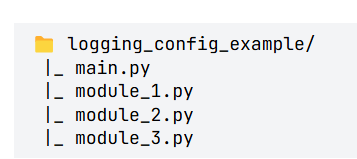

Реализация такой архитектуры -> https://stepik.org/lesson/759389/step/12?unit=761405

Через словарь тут -> https://stepik.org/lesson/759389/step/13?unit=761405

Внутри проекта имеет смысл хранить файл .env.example, у которого та же структура, что и у файла .env, но вместо реальных секретов хранятся примеры того, какими секреты должны быть. 

Библиотека environs

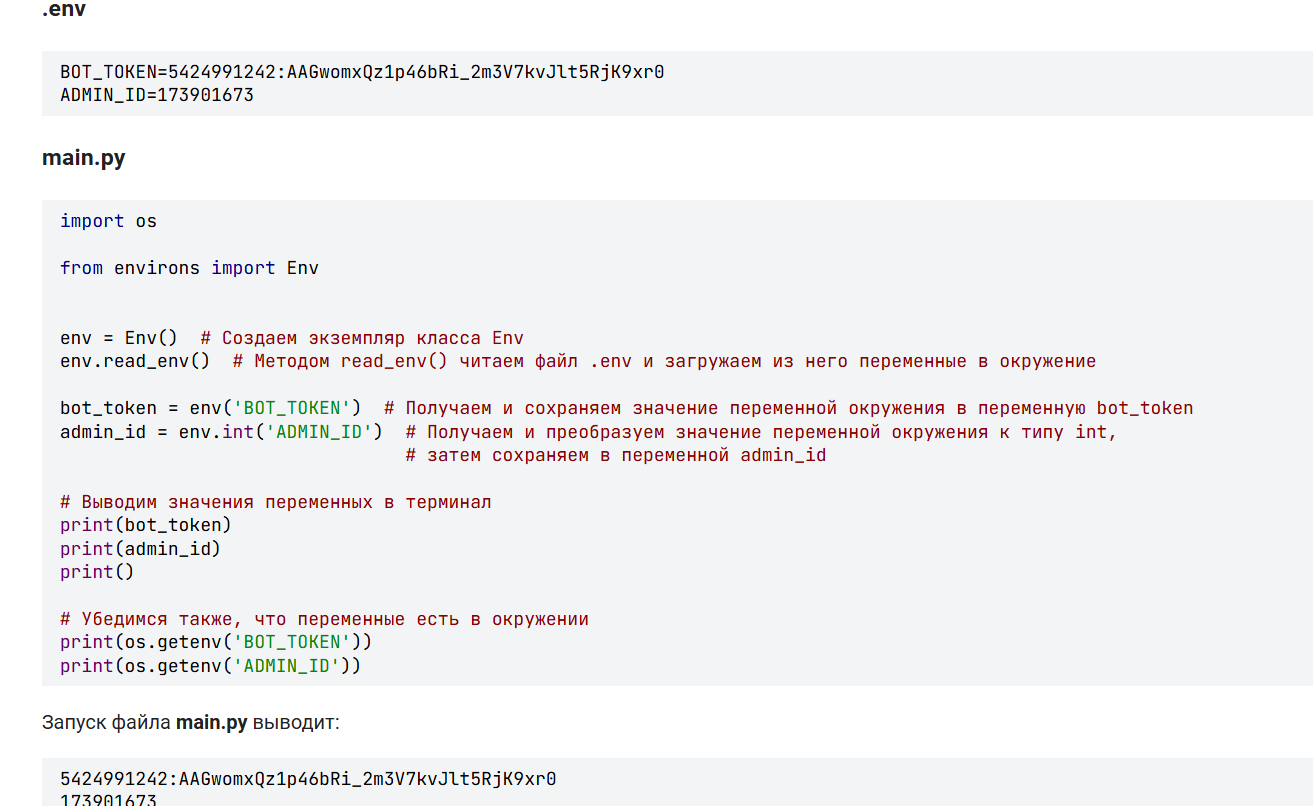

По сути как устроен бот:

Бот ждет апдейты от серверов телеграм. Это некоторый главный процесс, который запущен постоянно, и его задача просто получать апдейты, не суть важно каким способом. Через long polling или webhook - как настроите.

Но прежде чем бот войдет в режим ожидания апдейтов - его нужно сконфигурировать, то есть предварительно настроить, а значит, где-то должны храниться данные и методы для конфигурации бота. Настроили, запустили, ждем апдейты.

Когда пришел апдейт - нужно решить, что с ним делать - требуются ли какие-то предварительные действия или можно сразу отправлять его на обработчики. Это слой middleware.

Апдейт прошел слой middleware и отправился в сторону обработчиков, значит, где-то нужно хранить обработчики. Причем они тоже могут разделяться на группы. Хэндлеры для обычных пользователей, хэндлеры для платных пользователей, хэндлеры для админов и т.п.

В обработчиках есть фильтры, через которые должны проходить апдейты, чтобы обработчики срабатывали. Если есть какие-то кастомные фильтры - их тоже имеет смысл вынести отдельно.

Когда срабатывает обработчик на апдейт, прошедший через фильтры - может запускаться какая-то бизнес-логика. Ее тоже нужно хранить отдельно.

В процессе работы бизнес-логики, да и не только, часто нужно будет обращаться за какими-то данными - или из внешних сервисов, или из базы данных бота, то есть отдельно надо вынести работу с БД и работу с внешними API.

При взаимодействии с пользователем, бот должен будет пользователю что-то отвечать, то есть где-то нужно хранить возможные ответы, причем, иногда на разных языках.

Сообщения от бота могут быть не только и не столько в формате текста, очень часто это будут кнопки (обычные или инлайн), соответственно, нужно хранить клавиатуры с кнопками или методы их формирования на лету.

При взаимодействии пользователей с ботом, они могут находиться в разных состояниях, требующих разной реакции бота. Состояния будем рассматривать подробно, когда дойдем до машины состояний, сейчас остановимся на том, что логику состояний тоже нужно выносить отдельно.

Отдельно еще, бывает, выносят тесты, хотя почему-то среди разработчиков ботов это не частая практика, хотя и очень полезная. Мы с соавторами продвинутого курса даже написали отдельный модуль по тестированию бота.

Также нужны обработчики исключений, которые обязательно будут возникать при работе бота. Нам тоже нужно будет их отлавливать и обрабатывать, чтобы бот продолжал работать, а не падал, оставляя пользователей в недоумении.

Ну, и, наверное, нужно еще, на всякий случай, завести слой с какими-то вспомогательными функциями - утилитами, которые могут понадобиться в процессе работы бота, но по логике никуда больше не подходят.

Если подвести небольшой итог, в шаблоне имеет смысл заложить следующие разделы:

Конфигурационные данные
Точка входа (запуск бота)
Middleware
Фильтры
Хэндлеры
Бизнес-логика
Взаимодействие с БД
Взаимодействие с внешними API
Лексикон бота
Клавиатуры
Состояния
Тесты
Обработч

Примерный шаблон проекта:

In [ ]:
# 📁 tg_bot_template
#  |_ .env
#  |_ .env.example
#  |_ .gitignore
#  |_ main.py
#  |_ requirements.txt
#  |_ 📁 config_data
#  |   |_ __init__.py
#  |   |_ config.py
#  |_ 📁 errors
#  |   |_ __init__.py
#  |   |_ errors.py
#  |_ 📁 external_services
#  |   |_ __init__.py
#  |_ 📁 filters
#  |   |_ __init__.py
#  |   |_ is_admin.py
#  |_ 📁 handlers
#  |   |_ __init__.py
#  |   |_ admin.py
#  |   |_ private_user.py
#  |   |_ user.py
#  |_ 📁 keyboards
#  |   |_ __init__.py
#  |   |_ keyboard_utils.py
#  |   |_ set_menu.py
#  |_ 📁 lexicon
#  |   |_ __init__.py
#  |   |_ lexicon_ru.py
#  |   |_ lexicon_en.py
#  |_ 📁 middlewares
#  |   |_ __init__.py
#  |   |_ i18n.py
#  |   |_ throttling.py
#  |_ 📁 database
#  |   |_ __init__.py
#  |   |_ methods.py
#  |   |_ models.py
#  |_ 📁 services
#  |   |_ __init__.py
#  |   |_ services.py
#  |_ 📁 states
#  |   |_ __init__.py
#  |   |_ states.py
#  |_ 📁 tests
#  |   |_ __init__.py
#  |_ 📁 utils
#      |_ __init__.py
#      |_ utils.py

список шаблонов -> https://stepik.org/lesson/759404/step/5?unit=761420

In [ ]:
from dataclasses import dataclass
from environs import Env


@dataclass
class DatabaseConfig:
    database: str         # Название базы данных
    db_host: str          # URL-адрес базы данных
    db_user: str          # Username пользователя базы данных
    db_password: str      # Пароль к базе данных


@dataclass
class TgBot:
    token: str            # Токен для доступа к телеграм-боту
    admin_ids: list[int]  # Список id администраторов бота


@dataclass
class Config:
    tg_bot: TgBot
    db: DatabaseConfig


# Создаем экземпляр класса Env
env: Env = Env()

# Добавляем в переменные окружения данные, прочитанные из файла .env 
env.read_env()

# Создаем экземпляр класса Config и наполняем его данными из переменных окружения
config = Config(
    tg_bot=TgBot(
        token=env('BOT_TOKEN'),
        admin_ids=list(map(int, env.list('ADMIN_IDS')))
    ),
    db=DatabaseConfig(
        database=env('DATABASE'),
        db_host=env('DB_HOST'),
        db_user=env('DB_USER'),
        db_password=env('DB_PASSWORD')
    )
)


# Выводим значения полей экземпляра класса Config на печать, 
# чтобы убедиться, что все данные, получаемые из переменных окружения, доступны
print('BOT_TOKEN:', config.tg_bot.token)
print('ADMIN_IDS:', config.tg_bot.admin_ids)
print()
print('DATABASE:', config.db.database)
print('DB_HOST:', config.db.db_host)
print('DB_USER:', config.db.db_user)
print('DB_PASSWORD:', config.db.db_password)

На предыдущем шаге мы научились создавать экземпляр класса Config и наполнять его данными из переменных окружения. В принципе, в рабочем проекте бота, можно оставить все так, потому что при импорте экземпляра класса Config из модуля config.py в точку входа - весь код этого модуля все равно выполнится и данные будут доступны. Но хорошей практикой считается все-таки выполнять код не в модуле, а там, где его выполнение реально требуется, то есть в нашем случае, если обратиться к шаблону проекта, в исполняемом файле main.py. А в модуле config.py организовать в виде функции наполнение экземпляра класса Config данными из переменных окружения. В main.py, соответственно, импортировать эту функцию и вызвать ее, передав в качестве параметра путь к файлу .env.

In [ ]:
# ...

from config_data.config import load_config


config = load_config('<путь к файлу .env>')

# ...

# ...

bot_token = config.tg_bot.token           # Сохраняем токен в переменную bot_token
superadmin = config.tg_bot.admin_ids[0]   # Сохраняем ID админа в переменную superadmin

# ...

Пример точки входа

In [ ]:
import asyncio
import logging

from aiogram import Bot, Dispatcher
from aiogram.client.default import DefaultBotProperties
from aiogram.enums import ParseMode
from config_data.config import Config, load_config
# Импортируем роутеры
# ...
# Импортируем миддлвари
# ...
# Импортируем вспомогательные функции для создания нужных объектов
# ...
from keyboards.main_menu import set_main_menu

# Инициализируем логгер
logger = logging.getLogger(__name__)


# Функция конфигурирования и запуска бота
async def main():
    # Конфигурируем логирование
    logging.basicConfig(
        level=logging.INFO,
        format='%(filename)s:%(lineno)d #%(levelname)-8s '
               '[%(asctime)s] - %(name)s - %(message)s')

    # Выводим в консоль информацию о начале запуска бота
    logger.info('Starting bot')

    # Загружаем конфиг в переменную config
    config: Config = load_config()

    # Инициализируем объект хранилища
    storage = ...

    # Инициализируем бот и диспетчер
    bot = Bot(
        token=config.tg_bot.token,
        default=DefaultBotProperties(parse_mode=ParseMode.HTML)
    )
    dp = Dispatcher(storage=storage)

    # Инициализируем другие объекты (пул соединений с БД, кеш и т.п.)
    # ...

    # Помещаем нужные объекты в workflow_data диспетчера
    dp.workflow_data.update(...)

    # Настраиваем главное меню бота
    await set_main_menu(bot)

    # Регистриуем роутеры
    logger.info('Подключаем роутеры')
    # ...

    # Регистрируем миддлвари
    logger.info('Подключаем миддлвари')
    # ...

    # Пропускаем накопившиеся апдейты и запускаем polling
    await bot.delete_webhook(drop_pending_updates=True)
    await dp.start_polling(bot)


asyncio.run(main())

Диспетчер - корневой роутер

 мы не можем просто импортировать диспетчер в модули с хэндлерами и зарегистрировать в нем хэндлеры. Этого недостаточно. Надо еще как-то в исполняемом файле узнать, что хэндлеры вообще есть, а значит, исполнить код с ними, а это значит, что из них надо что-то импортировать. А импортировать, кроме самих хэндлеров, пока нечего.

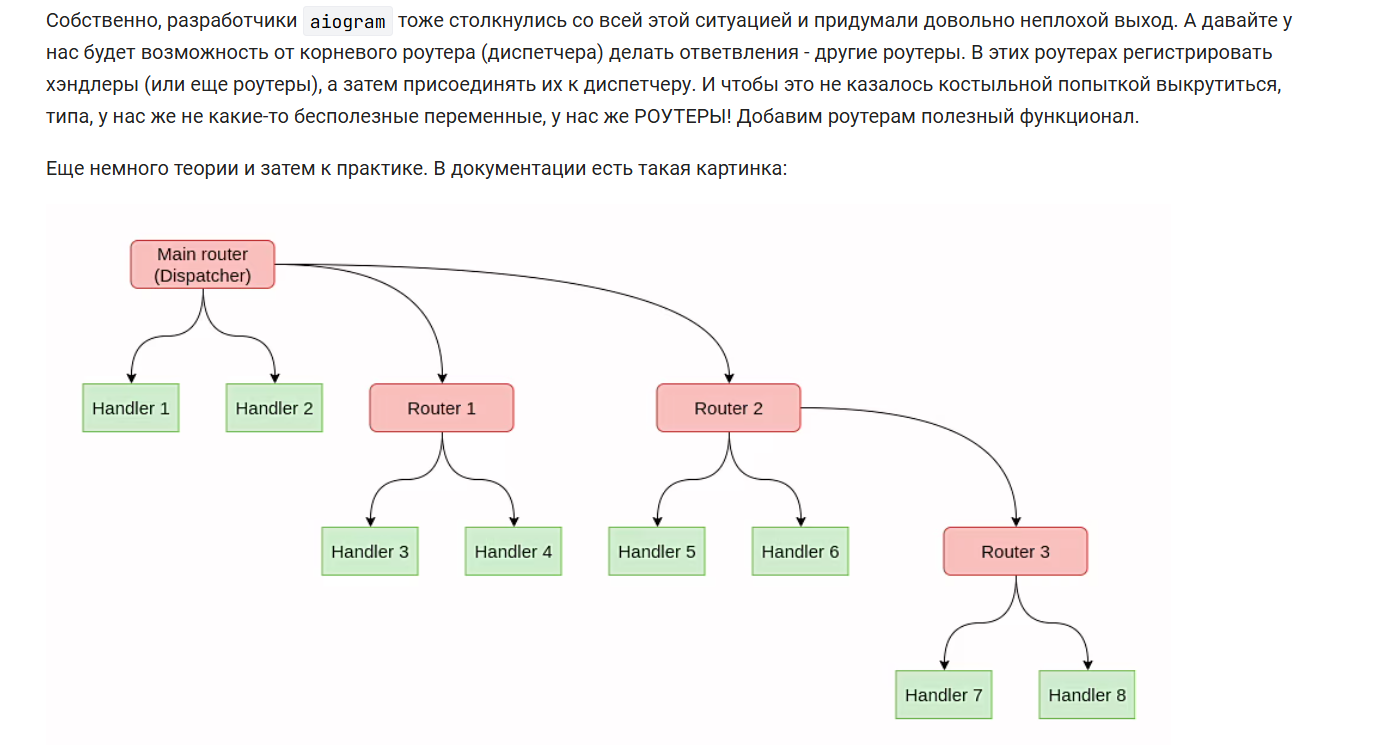

In [ ]:
import asyncio

from aiogram import Bot, Dispatcher
from config_data.config import Config, load_config
from handlers import other_handlers, user_handlers


# Функция конфигурирования и запуска бота
async def main():

    # Загружаем конфиг в переменную config
    config: Config = load_config()
    
    # Инициализируем бот и диспетчер
    bot = Bot(token=config.tg_bot.token)
    dp = Dispatcher()

    # Регистриуем роутеры в диспетчере
    dp.include_router(user_handlers.router)
    dp.include_router(other_handlers.router)

    # Пропускаем накопившиеся апдейты и запускаем polling
    await bot.delete_webhook(drop_pending_updates=True)
    await dp.start_polling(bot)



In [ ]:
from aiogram.filters import Command, CommandStart
from aiogram.types import Message
from lexicon.lexicon import LEXICON_RU

# Инициализируем роутер уровня модуля
router = Router()


# Этот хэндлер срабатывает на команду /start
@router.message(CommandStart())
async def process_start_command(message: Message):
    await message.answer(text=LEXICON_RU['/start'])


# Этот хэндлер срабатывает на команду /help
@router.message(Command(commands='help'))
async def process_help_command(message: Message):
    await message.answer(text=LEXICON_RU['/help'])

In [ ]:
from aiogram import Router
from aiogram.types import Message
from lexicon.lexicon import LEXICON_RU

# Инициализируем роутер уровня модуля
router = Router()


# Этот хэндлер будет срабатывать на любые ваши сообщения,
# кроме команд "/start" и "/help"
@router.message()
async def send_echo(message: Message):
    try:
        await message.send_copy(chat_id=message.chat.id)
    except TypeError:
        await message.reply(text=LEXICON_RU['no_echo'])

Кнопки

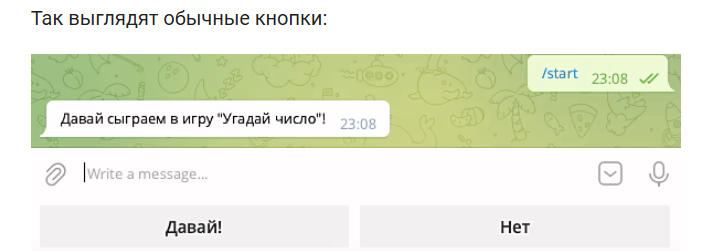

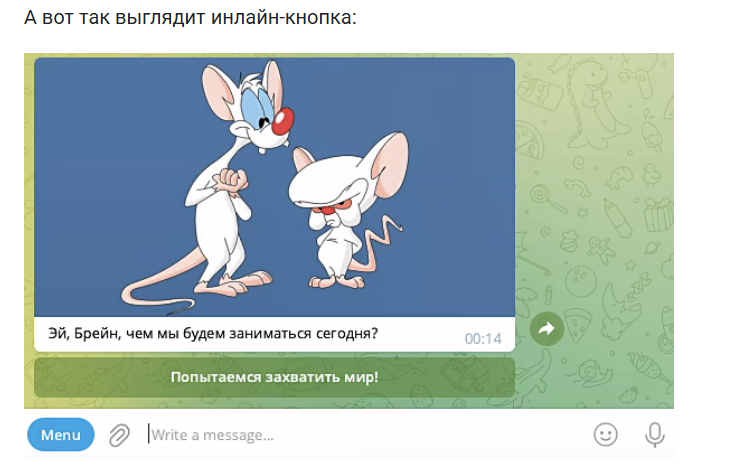

Для работы с обычными кнопками из aiogram.types понадобятся следующие классы:

ReplyKeyboardMarkup - для создания объекта клавиатуры (ссылка на документацию Telegram Bot API)
KeyboardButton - для создания кнопок клавиатуры (ссылка на документацию Telegram Bot API)
ReplyKeyboardRemove - для удаления клавиатуры (ссылка на документацию Telegram Bot API)

Клавиатуры можно строить по довольно простому принципу:

Создаем объекты кнопок клавиатуры
Создаем объект клавиатуры
Добавляем массивы нужной конфигурации с кнопками в основной массив клавиатуры

In [ ]:
from aiogram import Bot, Dispatcher, F
from aiogram.filters import CommandStart
from aiogram.types import (KeyboardButton, Message, ReplyKeyboardMarkup,
                           ReplyKeyboardRemove)

# Вместо BOT TOKEN HERE нужно вставить токен вашего бота,
# полученный у @BotFather
BOT_TOKEN = 'BOT TOKEN HERE'

# Создаем объекты бота и диспетчера
bot = Bot(token=BOT_TOKEN)
dp = Dispatcher()

# Создаем объекты кнопок
button_1 = KeyboardButton(text='Собак 🦮')
button_2 = KeyboardButton(text='Огурцов 🥒')

# Создаем объект клавиатуры, добавляя в него кнопки
keyboard = ReplyKeyboardMarkup(keyboard=[[button_1, button_2]])


# Этот хэндлер будет срабатывать на команду "/start"
# и отправлять в чат клавиатуру
@dp.message(CommandStart())
async def process_start_command(message: Message):
    await message.answer(
        text='Чего кошки боятся больше?',
        reply_markup=keyboard
    )


# Этот хэндлер будет срабатывать на ответ "Собак 🦮" и удалять клавиатуру
@dp.message(F.text == 'Собак 🦮')
async def process_dog_answer(message: Message):
    await message.answer(
        text='Да, несомненно, кошки боятся собак. '
             'Но вы видели как они боятся огурцов?',
        reply_markup=ReplyKeyboardRemove()
    )


# Этот хэндлер будет срабатывать на ответ "Огурцов 🥒" и удалять клавиатуру
@dp.message(F.text == 'Огурцов 🥒')
async def process_cucumber_answer(message: Message):
    await message.answer(
        text='Да, иногда кажется, что огурцов '
             'кошки боятся больше',
        reply_markup=ReplyKeyboardRemove()
    )


if __name__ == '__main__':
    dp.run_polling(bot)

можно их сделать значительно симпатичнее, если добавить в объект клавиатуры следующий аргумент resize_keyboard=True:

In [ ]:
keyboard = ReplyKeyboardMarkup(
    keyboard=[[button_1, button_2]],
    resize_keyboard=True
)

In [ ]:
import asyncio
import logging

from aiogram import Bot, Dispatcher
from aiogram.client.default import DefaultBotProperties
from aiogram.enums import ParseMode
from config_data.config import Config, load_config
from handlers import other_handlers, user_handlers

# Инициализируем логгер
logger = logging.getLogger(__name__)


# Функция конфигурирования и запуска бота
async def main():
    # Конфигурируем логирование
    logging.basicConfig(
        level=logging.INFO,
        format='%(filename)s:%(lineno)d #%(levelname)-8s '
               '[%(asctime)s] - %(name)s - %(message)s')

    # Выводим в консоль информацию о начале запуска бота
    logger.info('Starting bot')

    # Загружаем конфиг в переменную config
    config: Config = load_config()

    # Инициализируем бот и диспетчер
    bot = Bot(
        token=config.tg_bot.token,
        default=DefaultBotProperties(parse_mode=ParseMode.HTML)
    )
    dp = Dispatcher()

    # Регистриуем роутеры в диспетчере
    dp.include_router(user_handlers.router)
    dp.include_router(other_handlers.router)

    # Пропускаем накопившиеся апдейты и запускаем polling
    await bot.delete_webhook(drop_pending_updates=True)
    await dp.start_polling(bot)



keyboards.py

In [ ]:
from aiogram.types import ReplyKeyboardMarkup, KeyboardButton
from aiogram.utils.keyboard import ReplyKeyboardBuilder

from lexicon.lexicon_ru import LEXICON_RU

# ------- Создаем клавиатуру через ReplyKeyboardBuilder -------

# Создаем кнопки с ответами согласия и отказа
button_yes = KeyboardButton(text=LEXICON_RU['yes_button'])
button_no = KeyboardButton(text=LEXICON_RU['no_button'])

# Инициализируем билдер для клавиатуры с кнопками "Давай" и "Не хочу!"
yes_no_kb_builder = ReplyKeyboardBuilder()

# Добавляем кнопки в билдер с аргументом width=2
yes_no_kb_builder.row(button_yes, button_no, width=2)

# Создаем клавиатуру с кнопками "Давай!" и "Не хочу!"
yes_no_kb: ReplyKeyboardMarkup = yes_no_kb_builder.as_markup(
    one_time_keyboard=True,
    resize_keyboard=True
)

# ------- Создаем игровую клавиатуру без использования билдера -------

# Создаем кнопки игровой клавиатуры
button_1 = KeyboardButton(text=LEXICON_RU['rock'])
button_2 = KeyboardButton(text=LEXICON_RU['scissors'])
button_3 = KeyboardButton(text=LEXICON_RU['paper'])

# Создаем игровую клавиатуру с кнопками "Камень 🗿",
# "Ножницы ✂" и "Бумага 📜" как список списков
game_kb = ReplyKeyboardMarkup(
    keyboard=[[button_1],
              [button_2],
              [button_3]],
    resize_keyboard=True
)

user_handlers.py

In [ ]:
from aiogram import F, Router
from aiogram.filters import Command, CommandStart
from aiogram.types import Message
from keyboards.keyboards import game_kb, yes_no_kb
from lexicon.lexicon_ru import LEXICON_RU
from services.services import get_bot_choice, get_winner

router = Router()


# Этот хэндлер срабатывает на команду /start
@router.message(CommandStart())
async def process_start_command(message: Message):
    await message.answer(text=LEXICON_RU['/start'], reply_markup=yes_no_kb)


# Этот хэндлер срабатывает на команду /help
@router.message(Command(commands='help'))
async def process_help_command(message: Message):
    await message.answer(text=LEXICON_RU['/help'], reply_markup=yes_no_kb)


# Этот хэндлер срабатывает на согласие пользователя играть в игру
@router.message(F.text == LEXICON_RU['yes_button'])
async def process_yes_answer(message: Message):
    await message.answer(text=LEXICON_RU['yes'], reply_markup=game_kb)


# Этот хэндлер срабатывает на отказ пользователя играть в игру
@router.message(F.text == LEXICON_RU['no_button'])
async def process_no_answer(message: Message):
    await message.answer(text=LEXICON_RU['no'])


# Этот хэндлер срабатывает на любую из игровых кнопок
@router.message(F.text.in_([LEXICON_RU['rock'],
                            LEXICON_RU['paper'],
                            LEXICON_RU['scissors']]))
async def process_game_button(message: Message):
    bot_choice = get_bot_choice()
    await message.answer(text=f'{LEXICON_RU["bot_choice"]} '
                              f'- {LEXICON_RU[bot_choice]}')
    winner = get_winner(message.text, bot_choice)
    await message.answer(text=LEXICON_RU[winner], reply_markup=yes_no_kb)

services.py

In [ ]:
import random

from lexicon.lexicon_ru import LEXICON_RU


# Функция, возвращающая случайный выбор бота в игре
def get_bot_choice() -> str:
    return random.choice(['rock', 'paper', 'scissors'])


# Функция, возвращающая ключ из словаря, по которому
# хранится значение, передаваемое как аргумент - выбор пользователя 
def _normalize_user_answer(user_answer: str) -> str:
    for key in LEXICON_RU:
        if LEXICON_RU[key] == user_answer:
            break
    return key


# Функция, определяющая победителя
def get_winner(user_choice: str, bot_choice: str) -> str:
    user_choice = _normalize_user_answer(user_choice)
    rules = {'rock': 'scissors',
             'scissors': 'paper',
             'paper': 'rock'}
    if user_choice == bot_choice:
        return 'nobody_won'
    elif rules[user_choice] == bot_choice:
        return 'user_won'
    return 'bot_won'

Кнопка "Menu"
Какое-то время назад в Телеграме появилась возможность добавлять своему боту нативную кнопку "Menu" с командами и их описанием.

In [ ]:
from aiogram import Bot, Dispatcher
from aiogram.types import BotCommand

# Вместо BOT TOKEN HERE нужно вставить токен вашего бота,
# полученный у @BotFather
BOT_TOKEN = 'BOT TOKEN HERE'

# Создаем объекты бота и диспетчера
bot = Bot(token=BOT_TOKEN)
dp = Dispatcher()


# Создаем асинхронную функцию
async def set_main_menu(bot: Bot):

    # Создаем список с командами и их описанием для кнопки menu
    main_menu_commands = [
        BotCommand(command='/help',
                   description='Справка по работе бота'),
        BotCommand(command='/support',
                   description='Поддержка'),
        BotCommand(command='/contacts',
                   description='Другие способы связи'),
        BotCommand(command='/payments',
                   description='Платежи')
    ]

    await bot.set_my_commands(main_menu_commands)


# Регистрируем асинхронную функцию в диспетчере,
# которая будет выполняться на старте бота,
dp.startup.register(set_main_menu)
# Запускаем поллинг
dp.run_polling(bot)

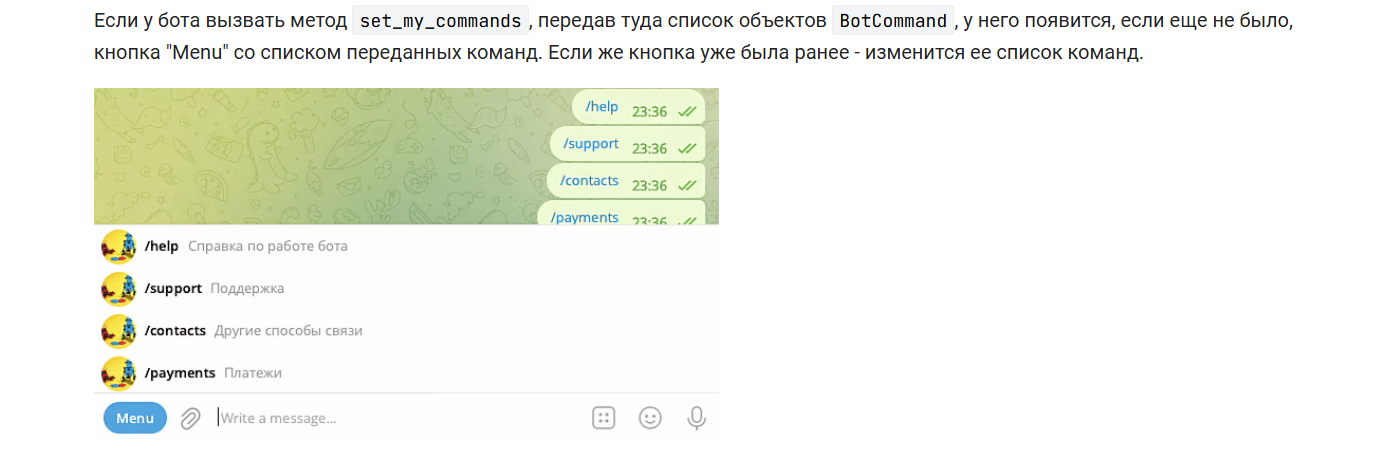

set_menu.py

In [ ]:
from aiogram import Bot
from aiogram.types import BotCommand

from lexicon.lexicon_ru import LEXICON_COMMANDS_RU


# Функция для настройки кнопки Menu бота
async def set_main_menu(bot: Bot):
    main_menu_commands = [
        BotCommand(
            command=command,
            description=description
        ) for command, description in LEXICON_COMMANDS_RU.items()
    ]
    await bot.set_my_commands(main_menu_commands)

lexicon_ru.py

In [ ]:
LEXICON_COMMANDS_RU: dict[str, str] = {
    '/command_1': 'command_1 desription',
    '/command_2': 'command_2 desription',
    '/command_3': 'command_3 desription',
    '/command_4': 'command_4 desription'
}

main.py

In [ ]:
# ...

from aiogram import Bot, Dispatcher
from keyboards.set_menu import set_main_menu

# ...


# Функция конфигурирования и запуска бота
async def main():
    # ...

    # Инициализируем бот и диспетчер
    bot = Bot(token=config.tg_bot.token,
              parse_mode='HTML')
    dp = Dispatcher()

    # Настраиваем кнопку Menu
    await set_main_menu(bot)

    # ...

Удаление кнопки Menu

In [ ]:
# Этот хэндлер будет срабатывать на команду "/delmenu"
# и удалять кнопку Menu c командами
@dp.message(Command(commands='delmenu'))
async def del_main_menu(message: Message, bot: Bot):
    await bot.delete_my_commands()
    await message.answer(text='Кнопка "Menu" удалена')

Инлайн-кнопки

Инлайн-кнопки, напротив, смотрятся более нативно и их можно запрограммировать на любое действие, а не только на отправку шаблонов сообщений, отправку телефона и/или геолокации, создания опроса и запуска веб-приложений. Результатом нажатия на инлайн-кнопку может быть вообще что угодно - на сколько хватит вашей фантазии. От заказа в интернет-магазине, до удаленного управления серверами на другом континенте.

За создание инлайн-кнопок отвечают следующие классы из aiogram.types:

InlineKeyboardMarkup - объект клавиатуры, принимающий список рядов кнопок (объектов InlineKeyboardButton)
InlineKeyboardButton - объект инлайн-кнопки

URL-кнопки
URL-кнопки - это такие инлайн-кнопки, нажатие на которые переводит нас в браузер по ссылке, связанной с этой кнопкой, или на какой-то внутренний ресурс самого Телеграм (канал, группу и т.п.) тоже по ссылке. За них отвечает атрибут url класса InlineKeyboardButton. Давайте посмотрим, как такие кнопки работают

In [ ]:
from aiogram import Bot, Dispatcher
from aiogram.filters import CommandStart
from aiogram.types import InlineKeyboardButton, InlineKeyboardMarkup, Message

# Вместо BOT TOKEN HERE нужно вставить токен вашего бота,
# полученный у @BotFather
BOT_TOKEN = 'BOT TOKEN HERE'

# Создаем объекты бота и диспетчера
bot = Bot(token=BOT_TOKEN)
dp = Dispatcher()

# Создаем объекты инлайн-кнопок
url_button_1 = InlineKeyboardButton(
    text='Курс "Телеграм-боты на Python и AIOgram"',
    url='https://stepik.org/120924'
)
url_button_2 = InlineKeyboardButton(
    text='Документация Telegram Bot API',
    url='https://core.telegram.org/bots/api'
)

# Создаем объект инлайн-клавиатуры
keyboard = InlineKeyboardMarkup(
    inline_keyboard=[[url_button_1],
                     [url_button_2]]
)


# Этот хэндлер будет срабатывать на команду "/start"
# и отправлять в чат клавиатуру c url-кнопками
@dp.message(CommandStart())
async def process_start_command(message: Message):
    await message.answer(
        text='Это инлайн-кнопки с параметром "url"',
        reply_markup=keyboard
    )


if __name__ == '__main__':
    dp.run_polling(bot)

Callback-кнопки
Данный вид кнопок - это, наверное, самый часто используемый вид инлайн-кнопок в телеграм-ботах, который очень сильно расширяет возможности мессенджера. Суть их работы сводится к тому, что при нажатии на такую кнопку приходит апдейт, в котором есть поле data. На апдейты с такими атрибутами можно настроить отдельные хэндлеры, которые будут запускать буквально любые сценарии. Давайте покажу на простом примере.

Пусть у нас по команде /start в чат пользователю отправляется сообщение с двумя инлайн-кнопками и параметрами callback_data равными 'big_button_1_pressed' и 'big_button_2_pressed'.

In [ ]:
from aiogram import Bot, Dispatcher
from aiogram.filters import CommandStart
from aiogram.types import InlineKeyboardButton, InlineKeyboardMarkup, Message

# Вместо BOT TOKEN HERE нужно вставить токен вашего бота,
# полученный у @BotFather
BOT_TOKEN = 'BOT TOKEN HERE'

# Создаем объекты бота и диспетчера
bot = Bot(token=BOT_TOKEN)
dp = Dispatcher()

# Создаем объекты инлайн-кнопок
big_button_1 = InlineKeyboardButton(
    text='БОЛЬШАЯ КНОПКА 1',
    callback_data='big_button_1_pressed'
)

big_button_2 = InlineKeyboardButton(
    text='БОЛЬШАЯ КНОПКА 2',
    callback_data='big_button_2_pressed'
)

# Создаем объект инлайн-клавиатуры
keyboard = InlineKeyboardMarkup(
    inline_keyboard=[[big_button_1],
                     [big_button_2]]
)


# Этот хэндлер будет срабатывать на команду "/start"
# и отправлять в чат клавиатуру с инлайн-кнопками
@dp.message(CommandStart())
async def process_start_command(message: Message):
    await message.answer(
        text='Это инлайн-кнопки. Нажми на любую!',
        reply_markup=keyboard
)


if __name__ == '__main__':
    dp.run_polling(bot)

эмодзи ->

форматирование текста:

In [ ]:
from aiogram import Bot, Dispatcher
from aiogram.filters import Command, CommandStart
from aiogram.types import Message

# Вместо BOT TOKEN HERE нужно вставить токен вашего бота,
# полученный у @BotFather
BOT_TOKEN = 'BOT TOKEN HERE'

bot = Bot(BOT_TOKEN)
dp = Dispatcher()


# Этот хэндлер будет срабатывать на команду "/start"
@dp.message(CommandStart())
async def process_start_command(message: Message):
    await message.answer(
        text='Привет!\n\nЯ бот, демонстрирующий '
             'как работает разметка. Отправь команду '
             'из списка ниже:\n\n'
             '/html - пример разметки с помощью HTML\n'
             '/markdownv2 - пример разметки с помощью MarkdownV2\n'
             '/noformat - пример с разметкой, но без указания '
             'параметра parse_mode'
    )


# Этот хэндлер будет срабатывать на команду "/help"
@dp.message(Command(commands='help'))
async def process_help_command(message: Message):
    await message.answer(
        text='Я бот, демонстрирующий '
             'как работает разметка. Отправь команду '
             'из списка ниже:\n\n'
             '/html - пример разметки с помощью HTML\n'
             '/markdownv2 - пример разметки с помощью MarkdownV2\n'
             '/noformat - пример с разметкой, но без указания '
             'параметра parse_mode'
    )


# Этот хэндлер будет срабатывать на команду "/html"
@dp.message(Command(commands='html'))
async def process_html_command(message: Message):
    await message.answer(
        text='Это текст, демонстрирующий '
             'как работает HTML-разметка:\n\n'
             '<b>Это жирный текст</b>\n'
             '<i>Это наклонный текст</i>\n'
             '<u>Это подчеркнутый текст</u>\n'
             '<span class="tg-spoiler">А это спойлер</span>\n\n'
             'Чтобы еще раз посмотреть список доступных команд - '
             'отправь команду /help',
        parse_mode='HTML'
    )


# Этот хэндлер будет срабатывать на команду "/markdownv2"
@dp.message(Command(commands='markdownv2'))
async def process_markdownv2_command(message: Message):
    await message.answer(
        text='Это текст, демонстрирующий '
             'как работает MarkdownV2\-разметка:\n\n'
             '*Это жирный текст*\n'
             '_Это наклонный текст_\n'
             '__Это подчеркнутый текст__\n'
             '||А это спойлер||\n\n'
             'Чтобы еще раз посмотреть список доступных команд \- '
             'отправь команду /help',
        parse_mode='MarkdownV2'
    )


# Этот хэндлер будет срабатывать на команду "/noformat"
@dp.message(Command(commands='noformat'))
async def process_noformat_command(message: Message):
    await message.answer(
        text='Это текст, демонстрирующий '
             'как отображается текст, если не указать '
             'параметр parse_mode:\n\n'
             '<b>Это мог бы быть жирный текст</b>\n'
             '_Это мог бы быть наклонный текст_\n'
             '<u>Это мог бы быть подчеркнутый текст</u>\n'
             '||А это мог бы быть спойлер||\n\n'
             'Чтобы еще раз посмотреть список доступных команд - '
             'отправь команду /help'
    )


# Этот хэндлер будет срабатывать на любые сообщения, кроме команд,
# отлавливаемых хэндлерами выше
@dp.message()
async def send_echo(message: Message):
    await message.answer(
        text='Я даже представить себе не могу, '
             'что ты имеешь в виду\n\n'
             'Чтобы посмотреть список доступных команд - '
             'отправь команду /help'
    )


# Запускаем поллинг
if __name__ == '__main__':
    dp.run_polling(bot)

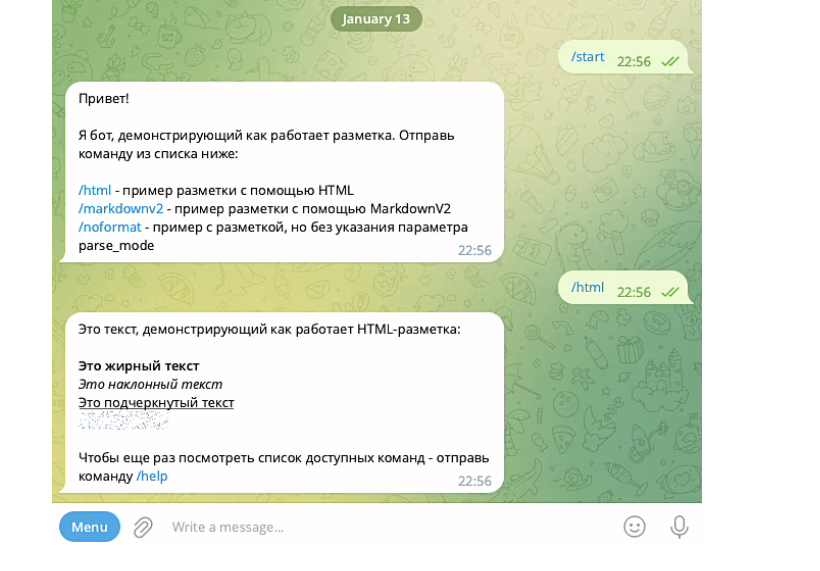